In [4]:
from keras.applications.xception import Xception
from keras.preprocessing import image 
import tensorflow as tf 
import numpy as np
import os
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
data_path = '/content/drive/MyDrive/A_Research_Project/Dataset/Dataset_B'
data_dir_list = os.listdir(data_path)

In [6]:
img_data_list = []

for dataclass in data_dir_list:
  img_list = os.listdir(data_path+"/"+dataclass)
  for img in img_list:
    img_path = data_path+"/"+dataclass+"/"+img
    img=image.load_img(img_path, target_size=(224, 224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    img_data_list.append(x)

img_data=np.array(img_data_list)

In [7]:
img_data=np.rollaxis(img_data,1,0)
img_data= img_data[0]

In [8]:
num_classes=2
num_of_sample=646
labels=np.ones(646,dtype='int64')

In [9]:
labels[0:437]=0
labels[437:646]=1

names=['benign', 'malignant']

In [11]:
from keras.utils import np_utils
Y=np_utils.to_categorical(labels, num_classes)

In [12]:
from sklearn.utils import shuffle
x,y = shuffle(img_data, Y, random_state=2)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

In [ ]:
image_input = Input(shape=(224,224,3))

In [ ]:
xception = Xception(input_tensor=image_input, weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(xception.output)

In [ ]:
prediction = Dense(2, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=xception.input, outputs=prediction)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
xy_train_datagen = ImageDataGenerator(rescale = 1./255, 
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

In [ ]:
xy_test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = xy_train_datagen.flow( X_train, y_train)

In [ ]:
test_set = xy_test_datagen.flow(X_test, y_test)                                           

In [ ]:
r =model.fit_generator(training_set,  epochs=100,  steps_per_epoch= 17, validation_data=test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
17/17 [==============================] - 122s 7s/step - loss: 2.0870 - accuracy: 0.6492 - val_loss: 0.9608 - val_accuracy: 0.6846
Epoch 2/100
17/17 [==============================] - 122s 7s/step - loss: 0.8458 - accuracy: 0.7926 - val_loss: 1.6587 - val_accuracy: 0.6308
Epoch 3/100
17/17 [==============================] - 122s 7s/step - loss: 0.6734 - accuracy: 0.7888 - val_loss: 0.5477 - val_accuracy: 0.8231
Epoch 4/100
17/17 [==============================] - 128s 8s/step - loss: 0.4213 - accuracy: 0.8760 - val_loss: 0.8061 - val_accuracy: 0.7231
Epoch 5/100
17/17 [==============================] - 123s 7s/step - loss: 0.3211 - accuracy: 0.8721 - val_loss: 0.4726 - val_accuracy: 0.8154
Epoch 6/100
17/17 [==============================] - 129s 8s/step - loss: 0.2706 - accuracy: 0.8992 - val_loss: 0.3977 - val_accuracy: 0.8538
Epoch 7/100
17/17 [==============================] - 123s 7s/step - loss

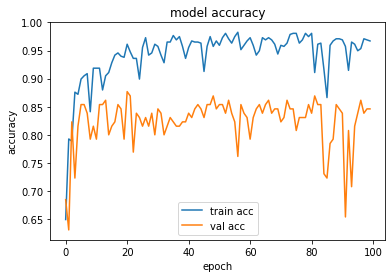

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate_generator(training_set,17) 
print("train_accuracy = ", scores[1])

In [ ]:
scores = model.evaluate_generator(test_set,17) 
print("val_accuracy = ", scores[1])

In [ ]:
prediction = model.predict_generator(test_set, steps=5 )

In [ ]:
rounded_prediction = np.argmax(prediction, axis=-1)

In [ ]:
true_categories_argmax = np.argmax(y_test, axis = 1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
cm = confusion_matrix(y_true=true_categories_argmax , y_pred=rounded_prediction)

In [ ]:
def plot_confusion_matrix(cm, num_classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(num_classes))
    plt.xticks(tick_marks, num_classes, rotation=45)
    plt.yticks(tick_marks, num_classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['benign', 'malignant']

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(true_categories_argmax, rounded_prediction, target_names=cm_plot_labels)

In [ ]:
 print(report)